## AML assignment 1

Submitted by:-

Tanmey Rawal(MDS201938)


### Description of task

The Sign Language Digits Dataset contains 2062 64×64 pixel images of the digits 0 to 9 represented using sign language. Here are examples of the images. We have to apply Bayesian Optimization to find the optimal neural network architecture to classify the dataset.

source of dataset : https://www.kaggle.com/ardamavi/sign-language-digits-dataset


### Libraries imported

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
import sklearn.gaussian_process as gp
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense , Flatten, Dropout
from keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('gp.py','wb').write(src)
import gp

%load gp.py
%run gp.py

Saving gp.py to gp (2).py


### Loading data

 I have uploaded the file in my drive but if the user wants to upload the file he can load the data by uncommenting the next two commands, I would be loading data from drive as it takes time to upload everytime I want to run this program.  

In [ ]:
#upload=files.upload()

In [ ]:
#X=np.load('X.npy')
#Y=np.load('Y.npy')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = np.load("/content/drive/My Drive/AML_dataset/X.npy")
Y = np.load("/content/drive/My Drive/AML_dataset/Y.npy")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

### Visualisation

(-0.5, 63.5, 63.5, -0.5)

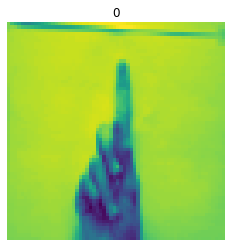

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.title(Y[0].argmax())
plt.axis("off")

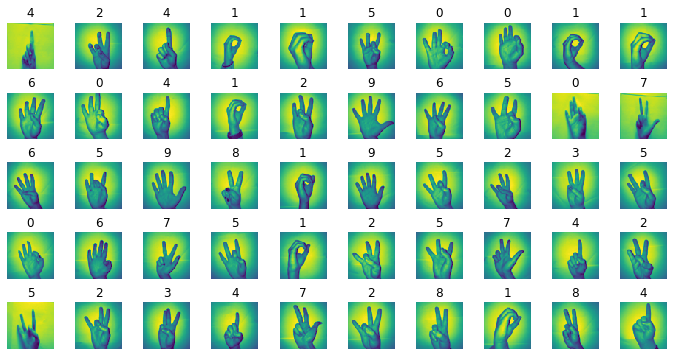

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index].argmax(), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [ ]:
X_train.shape

(1649, 64, 64)

In [ ]:
X_train = X_train.reshape(-1,64,64,1)
X_test = X_test.reshape(-1,64,64,1)

### Base model

This model is inspired from https://www.kaggle.com/efeergun96/deep-learning-on-sign-language-digits

In [ ]:
CNN_model = Sequential()

CNN_model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
CNN_model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.1))

CNN_model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.1))

CNN_model.add(Conv2D(filters=32,kernel_size=(2,2),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=32,kernel_size=(2,2),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.1))

CNN_model.add(Flatten())

CNN_model.add(Dense(128,activation="relu"))
CNN_model.add(Dense(64,activation="relu"))
CNN_model.add(Dense(40,activation="relu"))

CNN_model.add(Dense(10,activation="softmax"))

In [ ]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        12832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0

In [ ]:
CNN_model.compile(optimizer=keras.optimizers.Adam(lr = 0.00002), loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose = 1)
history = CNN_model.fit(X_train, y_train, epochs = 25, validation_data=(X_test, y_test),callbacks= [callback])

Epoch 1/25
52/52 [==============================] - 1s 19ms/step - loss: 2.3025 - accuracy: 0.1001 - val_loss: 2.3029 - val_accuracy: 0.0944
Epoch 2/25
52/52 [==============================] - 1s 12ms/step - loss: 2.3024 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1017
Epoch 3/25
52/52 [==============================] - 1s 12ms/step - loss: 2.3022 - accuracy: 0.1031 - val_loss: 2.3026 - val_accuracy: 0.0944
Epoch 4/25
52/52 [==============================] - 1s 12ms/step - loss: 2.3019 - accuracy: 0.1061 - val_loss: 2.3022 - val_accuracy: 0.0969
Epoch 5/25
52/52 [==============================] - 1s 12ms/step - loss: 2.3016 - accuracy: 0.1049 - val_loss: 2.3020 - val_accuracy: 0.0944
Epoch 6/25
52/52 [==============================] - 1s 12ms/step - loss: 2.3014 - accuracy: 0.1079 - val_loss: 2.3016 - val_accuracy: 0.1041
Epoch 7/25
52/52 [==============================] - 1s 12ms/step - loss: 2.3009 - accuracy: 0.1134 - val_loss: 2.3011 - val_accuracy: 0.1332
Epoch 8/25
52

In [ ]:
parameters = {
    'cnn_layers':[2,4],
    'dense_layers':[1,4],
    'dense_node_1':[128, 256],
    'dense_node_2':[64, 128],
    'dense_node_3':[32,64],
    'dense_node_4':[16,32],
    'dropout':[0.1,0.3],
    'lr':[0.0005, 0.0002],
    'batch_size':[32,64],
    'epochs':[30,100],
}
bounds = np.array([parameters[i] for i in parameters.keys()])

In [ ]:
def sample_loss_cnn(parameters):
    
    cnn_layers = np.int(parameters[0])
    dense_layers = np.int(parameters[1])
    dense_node_1 = np.int(parameters[2])
    dense_node_2 = np.int(parameters[3])
    dense_node_3 = np.int(parameters[4])
    dense_node_4 = np.int(parameters[5])
    dropout = parameters[6]
    lr= parameters[7]
    batch_size= np.int(parameters[8])
    epochs= np.int(parameters[9])

    CNN_model= Sequential()
    CNN_model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
    CNN_model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",padding="same"))
    CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
    kernel_size= [4,3,2]
    for i in range(cnn_layers):
        k= kernel_size[i]
        CNN_model.add(Conv2D(filters=32, kernel_size=(k,k), padding = 'same'))
        CNN_model.add(Conv2D(filters=32, kernel_size=(k,k), padding = 'same'))
        CNN_model.add(MaxPooling2D(pool_size=(2,2)))
        CNN_model.add(Dropout(dropout))
    CNN_model.add(Flatten())

    dense_layer_list=[dense_node_1,dense_node_2,dense_node_3,dense_node_4]
    for i in range(dense_layers):
        CNN_model.add(Dense(dense_layer_list[i], activation='relu'))

    CNN_model.add(Dense(10,activation="softmax"))
    CNN_model.compile(optimizer=keras.optimizers.Adam(lr = lr), loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
    callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, verbose = 1)
    
    history= CNN_model.fit(X_train, y_train,batch_size = batch_size, epochs = epochs,validation_data=(X_test, y_test), callbacks= [callback],verbose = 0)
    
    return np.max(history.history['val_accuracy'])

In [ ]:
xp, yp = bayesian_optimisation(n_iters=15, sample_loss=sample_loss_cnn,bounds=bounds, n_pre_samples=10)

Epoch 00065: early stopping
Epoch 00052: early stopping
Epoch 00074: early stopping
Epoch 00060: early stopping
Epoch 00064: early stopping
Epoch 00049: early stopping
Epoch 00036: early stopping
Epoch 00051: early stopping
Epoch 00083: early stopping
Epoch 00052: early stopping
Epoch 00083: early stopping
Epoch 00047: early stopping


In [ ]:
parameters = xp[np.array(yp).argmax(), :]

### Model after bayesian optimization

In [ ]:
cnn_layers = np.int(parameters[0])
dense_layers = np.int(parameters[1])
dense_node_1 = np.int(parameters[2])
dense_node_2 = np.int(parameters[3])
dense_node_3 = np.int(parameters[4])
dense_node_4 = np.int(parameters[5])
dropout = parameters[6]
lr = parameters[7]
batch_size = np.int(parameters[8])
epochs = np.int(parameters[9])

best_parameters = {
    'cnn_layers': cnn_layers,
    'dense_layers': dense_layers,
    'dense_node_1': dense_node_1,
    'dense_node_2': dense_node_2,
    'dense_node_3': dense_node_3,
    'dense_node_4': dense_node_4,
    'dropout': dropout,
    'lr': lr,
    'batch_size': batch_size,
    'epochs': epochs,
}

print(best_parameters)

CNN_model_best = Sequential()
CNN_model_best.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
CNN_model_best.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",padding="same"))
CNN_model_best.add(MaxPooling2D(pool_size=(2,2),padding="same"))

kernel_size = [4,3,2]
for i in range(cnn_layers):
  ks = kernel_size[i]
  CNN_model_best.add(Conv2D(filters=32, kernel_size=(ks,ks), padding = 'same'))
  CNN_model_best.add(Conv2D(filters=32, kernel_size=(ks,ks), padding = 'same'))
  CNN_model_best.add(MaxPooling2D(pool_size=(2,2)))
  CNN_model_best.add(Dropout(dropout))
    
CNN_model_best.add(Flatten())

dense_layer_list=[dense_node_1,dense_node_2,dense_node_3,dense_node_4]
for i in range(dense_layers):
  CNN_model_best.add(Dense(dense_layer_list[i], activation='relu'))

CNN_model_best.add(Dense(10,activation="softmax"))

CNN_model_best.compile(optimizer=keras.optimizers.Adam(lr = lr), loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, verbose = 1)
history = CNN_model_best.fit(X_train, y_train,batch_size = batch_size, epochs = epochs,validation_data=(X_test, y_test), callbacks= [callback], verbose = 1)

{'cnn_layers': 3, 'dense_layers': 2, 'dense_node_1': 159, 'dense_node_2': 111, 'dense_node_3': 40, 'dense_node_4': 31, 'dropout': 0.27373246914523086, 'lr': 0.000299986828351815, 'batch_size': 53, 'epochs': 70}
Epoch 1/70
32/32 [==============================] - 1s 25ms/step - loss: 2.3094 - accuracy: 0.1043 - val_loss: 2.3063 - val_accuracy: 0.0872
Epoch 2/70
32/32 [==============================] - 1s 17ms/step - loss: 2.3056 - accuracy: 0.1043 - val_loss: 2.3009 - val_accuracy: 0.0920
Epoch 3/70
32/32 [==============================] - 1s 17ms/step - loss: 2.3006 - accuracy: 0.1146 - val_loss: 2.2937 - val_accuracy: 0.1574
Epoch 4/70
32/32 [==============================] - 1s 17ms/step - loss: 2.2479 - accuracy: 0.1850 - val_loss: 1.9481 - val_accuracy: 0.3753
Epoch 5/70
32/32 [==============================] - 1s 17ms/step - loss: 1.5520 - accuracy: 0.4609 - val_loss: 0.8772 - val_accuracy: 0.6998
Epoch 6/70
32/32 [==============================] - 1s 17ms/step - loss: 1.0034 - ac

In [ ]:
CNN_model_best.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_185 (Conv2D)          (None, 64, 64, 16)        416       
_________________________________________________________________
conv2d_186 (Conv2D)          (None, 64, 64, 32)        12832     
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_187 (Conv2D)          (None, 32, 32, 32)        16416     
_________________________________________________________________
conv2d_188 (Conv2D)          (None, 32, 32, 32)        16416     
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 16, 16, 32)      

### Final result

We have increased our accuracy on validation data from 66.59 to 97.34% after applying bayesian optimization.

### Code explained in brief



1.   First required libraries are installed. 
2.   Dataset is uploaded
3.   Base model is created where all hyperparameters were randomly 
4.   To improve accuracy,  better hyperparameters should be choosen. Bounds were established on the range of various hyperparmeters bayesian optimization was performed. Best hyperparameters from the given range were obtained. For this task following hyperparmeters were taken : 

*   Number of cnn layers
*   Number of dense layers
*   The number of nodes in each dense layer
*   dropout rate (used for regularization)
*   learning rate
*   batch size
*   epochs
5. New CNN model was created using hyperparmeters obtained after bayesian optimization process





### References

https://www.kaggle.com/efeergun96/deep-learning-on-sign-language-digits

https://github.com/ageron/handson-ml2

https://github.com/thuijskens/bayesian-optimization

https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

https://keras.io/api/optimizers/
